In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sns.set(style="whitegrid")
%matplotlib inline

In [14]:
covid = pd.read_csv("covid_19_clean_complete.csv", parse_dates=["Date"])
happiness = pd.read_csv("2019.csv")
print(covid.head())
print(happiness.head())



  Province/State Country/Region       Lat       Long       Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953 2020-01-22          0   
1            NaN        Albania  41.15330  20.168300 2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600 2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800 2020-01-22          0   
4            NaN         Angola -11.20270  17.873900 2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa  
   Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.38

C:\Users\hp\AppData\Local\Temp\ipykernel_23220\281513913.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  covid = pd.read_csv("covid_19_clean_complete.csv", parse_dates=["Date"])


In [9]:
happiness.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [15]:
covid_grouped = covid.groupby(["Country/Region","Date"]).sum().reset_index()

# Pick final date (latest available data)
latest_date = covid_grouped["Date"].max()
covid_latest = covid_grouped[covid_grouped["Date"] == latest_date]

# Keep relevant columns
covid_latest = covid_latest[["Country/Region","Confirmed","Deaths","Recovered","Population"]] \
    if "Population" in covid_latest.columns else covid_latest[["Country/Region","Confirmed","Deaths","Recovered"]]

# If no population in dataset, you can add manually or skip per-100k metrics
if "Population" in covid_latest.columns:
    covid_latest["cases_per_100k"] = covid_latest["Confirmed"] / covid_latest["Population"] * 100000
    covid_latest["deaths_per_100k"] = covid_latest["Deaths"] / covid_latest["Population"] * 100000

In [21]:
happiness = happiness.rename(columns={
    "Country or region":"Country",
    "Score":"Happiness Score"
})



In [20]:
merged = covid_latest.merge(happiness, left_on="Country/Region", right_on="Country", how="inner")
print("Merged shape:", merged.shape)
merged.head()




Merged shape: (145, 13)


,Country/Region,Confirmed,Deaths,Recovered,Overall rank,Country,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Afghanistan,36263,1269,25198,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
1,Albania,4880,144,2745,107,Albania,4.719,0.947,0.848,0.874,0.383,0.178,0.027
2,Algeria,27973,1163,18837,88,Algeria,5.211,1.002,1.160,0.785,0.086,0.073,0.114
3,Argentina,167416,3059,72575,47,Argentina,6.086,1.092,1.432,0.881,0.471,0.066,0.050
4,Armenia,37390,711,26665,116,Armenia,4.559,0.850,1.055,0.815,0.283,0.095,0.064


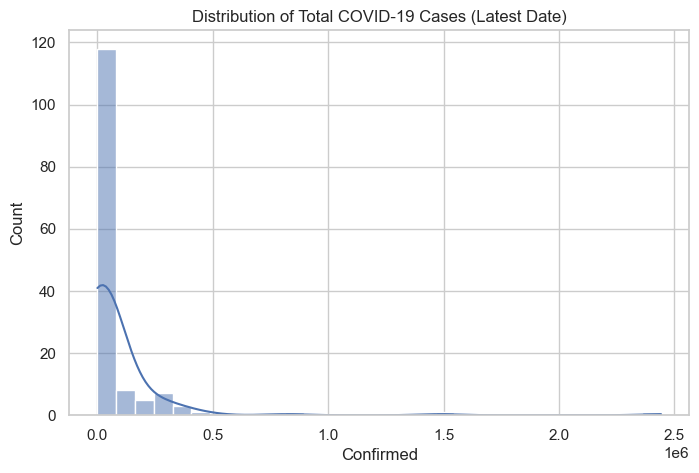

In [25]:
plt.figure(figsize=(8,5))
sns.histplot(merged["Confirmed"], bins=30, kde=True)
plt.title("Distribution of Total COVID-19 Cases (Latest Date)")
plt.show()



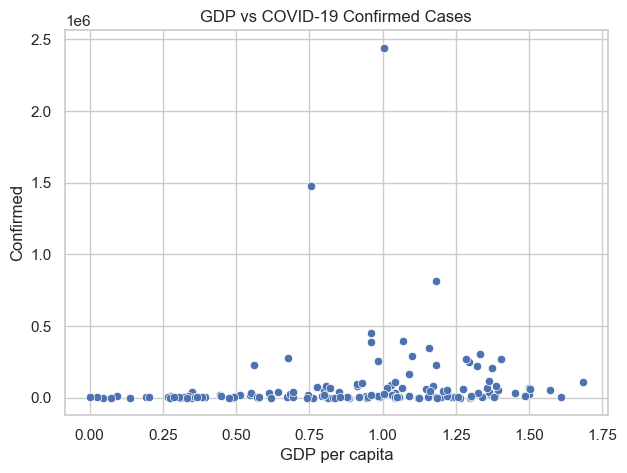

In [24]:
plt.figure(figsize=(7,5))
sns.scatterplot(x="GDP per capita", y="Confirmed", data=merged)
plt.title("GDP vs COVID-19 Confirmed Cases")
plt.show()


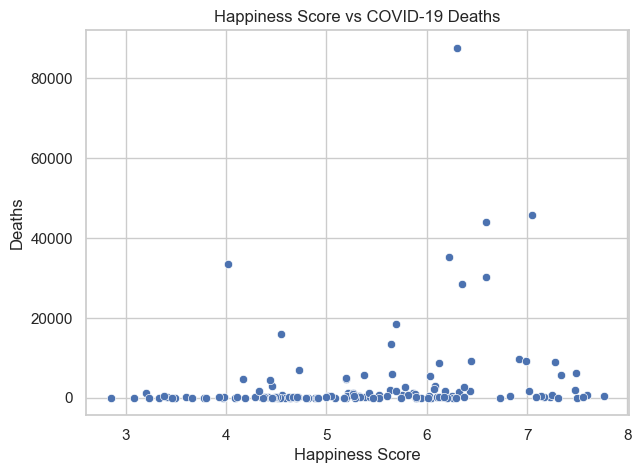

In [26]:
plt.figure(figsize=(7,5))
sns.scatterplot(x="Happiness Score", y="Deaths", data=merged)
plt.title("Happiness Score vs COVID-19 Deaths")
plt.show()


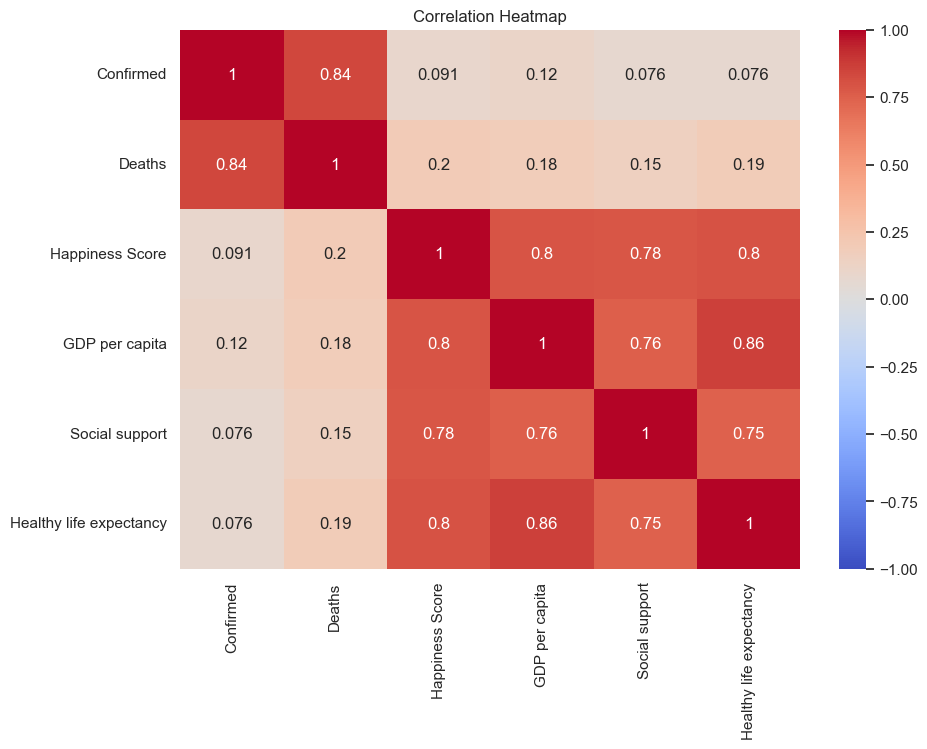

In [33]:
happiness = happiness[["Country","Happiness Score","GDP per capita","Social support","Healthy life expectancy"]]
plt.figure(figsize=(10,7))
sns.heatmap(merged[["Confirmed","Deaths","Happiness Score","GDP per capita","Social support","Healthy life expectancy"]].corr(),
            annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()



In [34]:
ranked = merged.sort_values("Happiness Score", ascending=False)
top25 = ranked.head(25)
bottom25 = ranked.tail(25)

print("Top 25 mean deaths:", top25["Deaths"].mean())
print("Bottom 25 mean deaths:", bottom25["Deaths"].mean())


Top 25 mean deaths: 7217.72
Bottom 25 mean deaths: 1702.84


In [35]:
merged.to_csv("merged_covid_happiness_2019.csv", index=False)
